# K Mean Without Library Function

In [ ]:
# Clustering Without Libraries (built in function) 

In [97]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Importing libraries for evaluations
from sklearn.metrics import silhouette_samples, silhouette_score,rand_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import rand_score
import random

In [6]:
# this ftn would just load the provided data set as pandas frame
# return the data with actual labels in X and y respectively
def load_dataset(filepath):
    # loading data Set (Path.csv)
    train = np.genfromtxt(filepath, delimiter=',')
    X= train[:,0:2]
    y= train[:,2]
    return X,y          

In [7]:
w_X_path,w_y_path = load_dataset('/home/usman/Data_Sets/Path.csv')
w_X_artf,w_y_artf = load_dataset('/home/usman/Data_Sets/Artificial.csv')
w_X_spir,w_y_spir = load_dataset('/home/usman/Data_Sets/Spiral.csv')

In [11]:
print(w_X_path.shape)

(300, 2)


In [16]:
K=3     # no. of cluster used Elbow method to find the optimal value for K
n_iter=50         # no. of iteration

In [51]:
# computing the initial centroids randomly
def get_centriods(X):
    m=X.shape[0]
    n=X.shape[1] 

    # creating an empty centroid array
    centroids=np.array([]).reshape(n,0) 
    print(centroids.shape)
    # creating 3 random centroids
    for k in range(K):
        centroids=np.c_[centroids,X[random.randint(0,m-1)]]
        
    return centroids,m,n

    

In [52]:
centroids_path,m_path,n_path = get_centriods(w_X_path)
centroids_artf,m_artf,n_artf = get_centriods(w_X_artf)
centroids_spir,m_spir,n_spir = get_centriods(w_X_spir)

(2, 0)
(2, 0)
(2, 0)


In [53]:
def get_euclidean(X,m,centroids):
    
    output={}

    # creating an empty array
    euclid=np.array([]).reshape(m,0)
    print(euclid)
    # finding distance between for each centroid  using Euclidean Distance
    for k in range(K):
           dist=np.sum((X-centroids[:,k])**2,axis=1)
           euclid=np.c_[euclid,dist]

    # storing the minimum value we have computed
    minimum=np.argmin(euclid,axis=1)+1
    return minimum

In [54]:
minimum_path = get_euclidean(w_X_path,m_path,centroids_path)
minimum_artf = get_euclidean(w_X_artf,m_artf,centroids_artf)
minimum_spir = get_euclidean(w_X_spir,m_spir,centroids_spir)

[]
[]
[]


In [56]:
minimum_artf

array([1, 2, 2, ..., 2, 3, 3])

In [57]:
# computing the mean of separated clusters
def computing_mean(centroids,minimum,X):
    
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(2,0)

    # assigning of clusters to points
    for k in range(m):
        cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T

    # computing mean and updating it
    for k in range(K):
         centroids[:,k]=np.mean(cent[k+1],axis=0)
    return  centroids,cent      

In [59]:
centroids_path,cent_path = computing_mean(centroids_path,minimum_path,w_X_path)
centroids_artf,cent_artf = computing_mean(centroids_artf,minimum_artf,w_X_artf)
centroids_spir,cent_spir = computing_mean(centroids_spir,minimum_spir,w_X_spir)

In [89]:
# repeating the above steps again and again
def rep_again(centroids,X,m):
    
    for i in range(n_iter):
          euclid=np.array([]).reshape(m,0)
          for k in range(K):
              dist=np.sum((X-centroids[:,k])**2,axis=1)
              euclid=np.c_[euclid,dist]
          C=np.argmin(euclid,axis=1)+1
          cent={}
          for k in range(K):
               cent[k+1]=np.array([]).reshape(2,0)
          for k in range(m):
               cent[C[k]]=np.c_[cent[C[k]],X[k]]
          for k in range(K):
               cent[k+1]=cent[k+1].T
          for k in range(K):
               centroids[:,k]=np.mean(cent[k+1],axis=0)
          final=cent
    return centroids,final,C    

In [90]:
centroids_path,final_path,y_pred_path = rep_again(centroids_path,w_X_path,m_path)
centroids_artf,final_artf,y_pred_artf = rep_again(centroids_artf,w_X_artf,m_artf)
centroids_spir,final_spir,y_pred_spir = rep_again(centroids_spir,w_X_spir,m_spir)

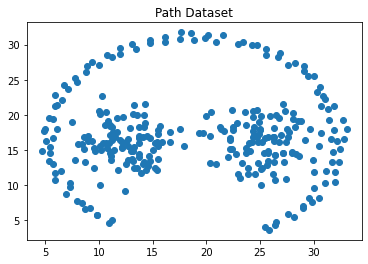

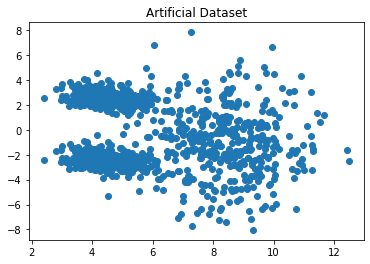

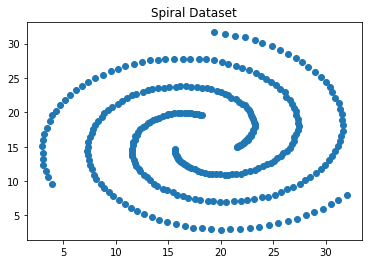

In [79]:
plt.scatter(w_X_path[:,0],w_X_path[:,1])
# plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Path Dataset')
plt.show()

plt.scatter(w_X_artf[:,0],w_X_artf[:,1])
# plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Artificial Dataset')
plt.show()


plt.scatter(w_X_spir[:,0],w_X_spir[:,1])
# plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Spiral Dataset')
plt.show()



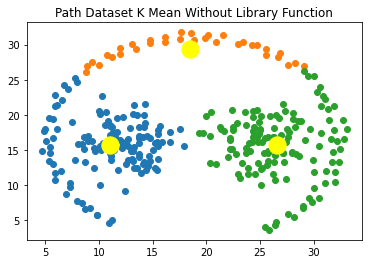

In [164]:
for k in range(K):
    plt.scatter(final_path[k+1][:,0],final_path[k+1][:,1])
plt.scatter(centroids_path[0,:],centroids_path[1,:],s=300,c='yellow')
# plt.rcParams.update({'figure.figsize':(6,5), 'figure.dpi':100})
plt.title('Path Dataset K Mean Without Library Function')
plt.show()

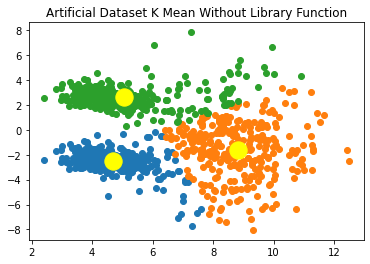

In [165]:
for k in range(K):
    plt.scatter(final_artf[k+1][:,0],final_artf[k+1][:,1])
plt.scatter(centroids_artf[0,:],centroids_artf[1,:],s=300,c='yellow')
# plt.rcParams.update({'figure.figsize':(6,5), 'figure.dpi':100})
plt.title('Artificial Dataset K Mean Without Library Function')
plt.show()

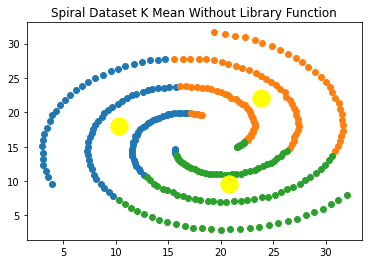

In [166]:
for k in range(K):
    plt.scatter(final_spir[k+1][:,0],final_spir[k+1][:,1])
plt.scatter(centroids_spir[0,:],centroids_spir[1,:],s=300,c='yellow')
# plt.rcParams.update({'figure.figsize':(6,5), 'figure.dpi':100})
plt.title('Spiral Dataset K Mean Without Library Function')
plt.show()

In [103]:
eval_kmean   = {'path':{},'artf':{},'spir':{}}

In [104]:
def sihouette_calc(X,y_pred):
    silhouette_avg = silhouette_score(X, y_pred)
    print(silhouette_avg)
    return silhouette_avg

In [146]:
eval_kmean['path']['sihouette']   = sihouette_calc(w_X_path,y_pred_path)
eval_kmean['artf']['sihouette']   = sihouette_calc(w_X_artf,y_pred_artf)
eval_kmean['spir']['sihouette']   = sihouette_calc(w_X_spir,y_pred_spir)

0.5420275543619765
0.5492679494658761
0.36141515270397445


In [147]:
# 2.Computing Purity Score

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
#     print(np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix))
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [159]:
eval_kmean['path']['purity']      = purity_score(w_y_path,y_pred_path)
eval_kmean['artf']['purity']      = purity_score(w_y_artf,y_pred_artf)
eval_kmean['spir']['purity']      = purity_score(w_y_spir,y_pred_spir)

In [149]:
def rand_index(y_true,y_pred):
    from sklearn.metrics.cluster import rand_score
    rand_score = rand_score(y_true, y_pred)
    print(rand_score)
    return rand_score

In [150]:
eval_kmean['path']['rand_index']   = rand_index(w_y_path,y_pred_path)
eval_kmean['artf']['rand_index']   = rand_index(w_y_artf,y_pred_artf)
eval_kmean['spir']['rand_index']   = rand_index(w_y_spir,y_pred_spir)

0.7477814938684504
0.8593255934683091
0.5541058619836755


In [151]:
def calinski_score(X,y_pred):
    from sklearn.metrics.cluster import calinski_harabasz_score
    ch_index = calinski_harabasz_score(X, y_pred)
    print(ch_index)
    return ch_index

In [152]:
eval_kmean['path']['calinski_score']   = calinski_score(w_X_path,y_pred_path)
eval_kmean['artf']['calinski_score']   = calinski_score(w_X_artf,y_pred_artf)
eval_kmean['spir']['calinski_score']   = calinski_score(w_X_spir,y_pred_spir)

359.03359301554286
1269.3839473643336
237.52519738760543


In [153]:
def davies_score(X,y_pred):
    
    from sklearn.metrics.cluster import davies_bouldin_score
    db_index = davies_bouldin_score(X, y_pred)
    print(db_index)
    return db_index

In [154]:
eval_kmean['path']['davies_score']   = davies_score(w_X_path,y_pred_path)
eval_kmean['artf']['davies_score']   = davies_score(w_X_artf,y_pred_artf)
eval_kmean['spir']['davies_score']   = davies_score(w_X_spir,y_pred_spir)

0.6662412952246745
0.6986488218381682
0.8892926294746718


In [160]:
eval_kmean

{'path': {'sihouette': 0.5420275543619765,
  'purity': 0.7433333333333333,
  'rand_index': 0.7477814938684504,
  'calinski_score': 2.3935572867702857,
  'davies_score': 0.6662412952246745},
 'artf': {'sihouette': 0.5492679494658761,
  'rand_index': 0.8593255934683091,
  'calinski_score': 8.462559649095557,
  'davies_score': 0.6986488218381682,
  'purity': 0.8870168483647175},
 'spir': {'sihouette': 0.36141515270397445,
  'rand_index': 0.5541058619836755,
  'calinski_score': 1.5835013159173696,
  'davies_score': 0.8892926294746718,
  'purity': 0.34615384615384615}}

In [161]:
# normalizing the calinski_score values so that the graph could be visualized properly

eval_kmean['path']['calinski_score']   = eval_kmean['path']['calinski_score']/150
eval_kmean['artf']['calinski_score']   = eval_kmean['artf']['calinski_score']/150
eval_kmean['spir']['calinski_score']   = eval_kmean['spir']['calinski_score']/150


In [162]:
eval_kmean

{'path': {'sihouette': 0.5420275543619765,
  'purity': 0.7433333333333333,
  'rand_index': 0.7477814938684504,
  'calinski_score': 0.01595704857846857,
  'davies_score': 0.6662412952246745},
 'artf': {'sihouette': 0.5492679494658761,
  'rand_index': 0.8593255934683091,
  'calinski_score': 0.05641706432730371,
  'davies_score': 0.6986488218381682,
  'purity': 0.8870168483647175},
 'spir': {'sihouette': 0.36141515270397445,
  'rand_index': 0.5541058619836755,
  'calinski_score': 0.010556675439449131,
  'davies_score': 0.8892926294746718,
  'purity': 0.34615384615384615}}

In [163]:
# writing these evaluations to a file 
import json

with open('convert.txt', 'w') as convert_file:
    convert_file.write(json.dumps(eval_kmean))
